In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract

In [4]:
import cv2
import pytesseract as pyt

img = cv2.imread("/content/Receipt.jpg")
text = pyt.image_to_string(img)
print(text)

 

RESTORAN WAN SHENG
002043319-W
No.2, Jalan Temenggung 19/9,
Seksyen 9, Bandar Mahkota Cheras,
43200 Cheras, Selangor
GST REG NO: 001335787520

Tax Invoice

INV No.: 1054650 Cashier: Nicole
Date +: 21-03-2018 16:08:24

2 x 2,20 4.40 SR
1x 1.70 1.70 SR

Bunga Kekwa

Take Away

x 0.20 0.60 SR
Total Q
Tota] (Excluding GST): 6.33
GST payable (6%): 0,37
Total (Inclusive of GST): 6,70
TOTAL: 6.70
CASH : 6.70

GST Summary Amount(RM) — Tax(RM)
SR (@ 6%) 6.33 0,37

 

_ =



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


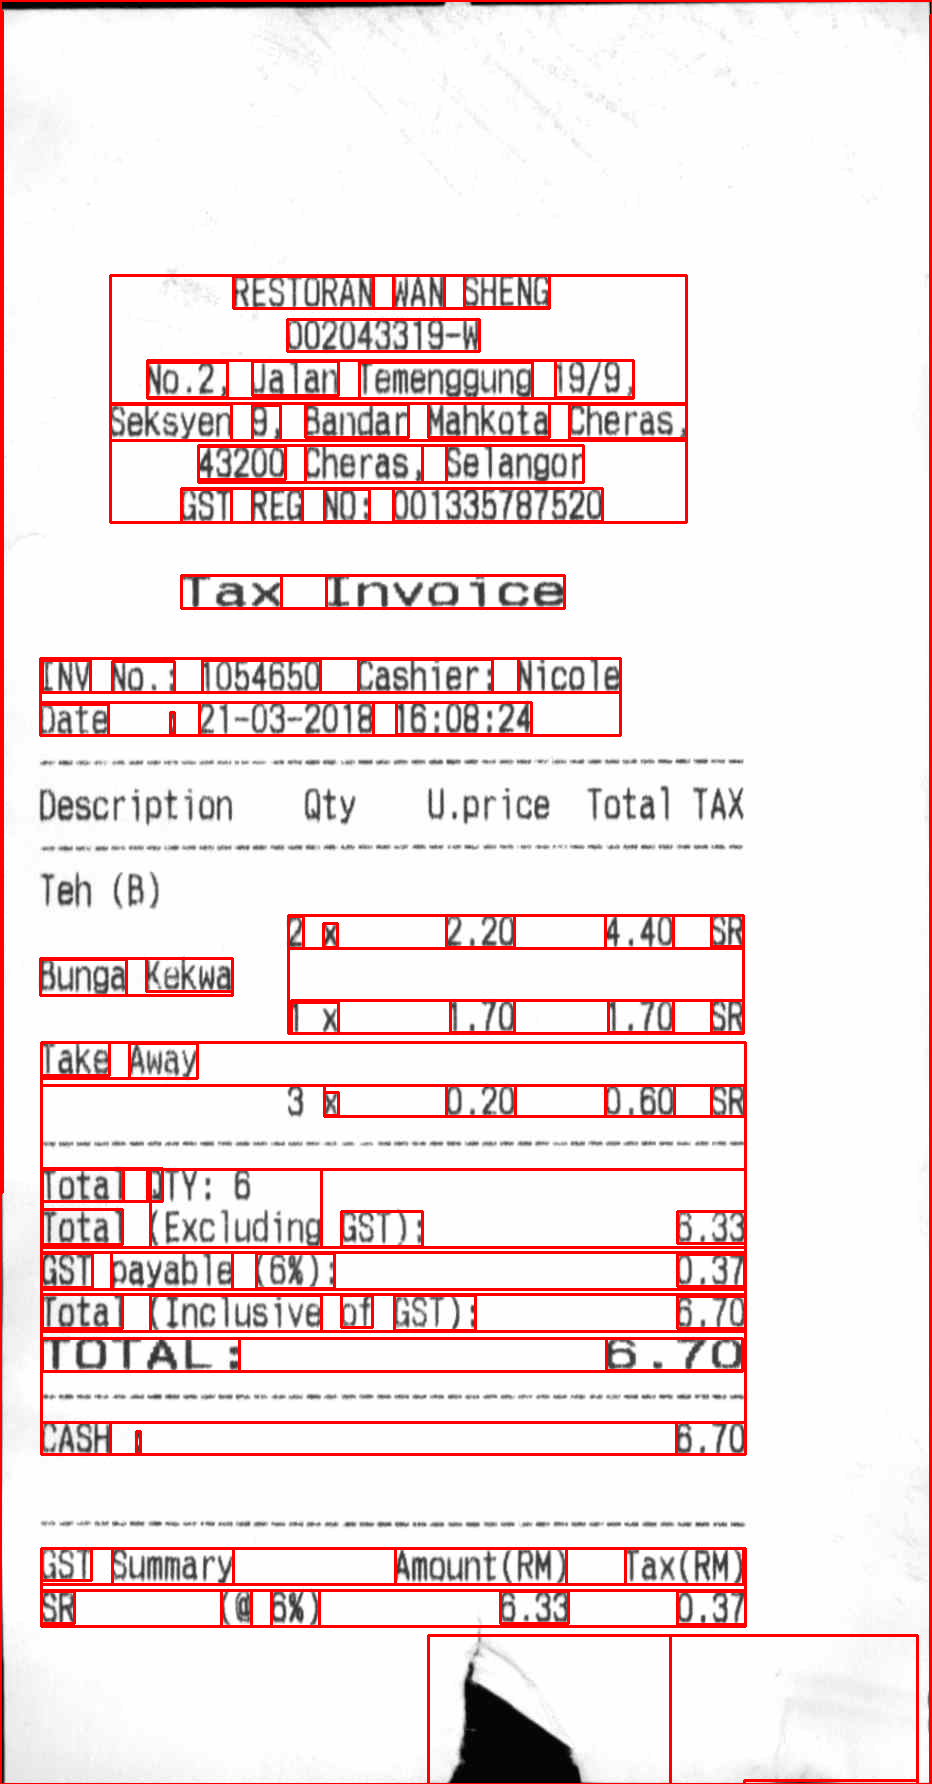

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [7]:
from pytesseract import Output
from google.colab.patches import cv2_imshow
data = pyt.image_to_data(img, output_type=Output.DICT)
n_boxes = len(data['level'])
for i in range(n_boxes):
  (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])    
  img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(img)
print(data)

In [ ]:
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
print(remove_punctuation(text))

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

In [ ]:
x1_1,y1_1,x2_1,y2_1,x3_1,y3_1,x4_1,y4_1,transcript_1
 
72,25,326,25,326,64,72,64,TAN WOON YANN
50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
205,121,285,121,285,139,205,139,789417-W
110,144,383,144,383,163,110,163,NO.53 55,57 & 59, JALAN SAGU 18,
192,169,299,169,299,187,192,187,TAMAN DAYA,
162,193,334,193,334,211,162,211,81100 JOHOR BAHRU,


In [8]:
#dataset
!git clone https://github.com/zzzDavid/ICDAR-2019-SROIE.git

Cloning into 'ICDAR-2019-SROIE'...
remote: Enumerating objects: 2386, done.
remote: Total 2386 (delta 0), reused 0 (delta 0), pack-reused 2386
Receiving objects: 100% (2386/2386), 278.63 MiB | 26.43 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Checking out files: 100% (1980/1980), done.


In [9]:
!mkdir boxes_and_transcripts images entities

In [10]:
import os
import pandas
import json
import csv
import shutil

## Input dataset
data_path = "ICDAR-2019-SROIE/data/"
box_path = data_path + "box/"
img_path = data_path + "img/"
key_path = data_path + "key/"

## Output dataset
out_boxes_and_transcripts = "/content/boxes_and_transcripts/"
out_images = "/content/images/"
out_entities  = "/content/entities/"

train_samples_list =  []
for file in os.listdir(data_path + "box/"):
  
  ## Reading csv
  with open(box_path +file, "r") as fp:
    reader = csv.reader(fp, delimiter=",")
    rows = [[1] + x[:8] + [','.join(x[8:]).strip(',')] for x in reader] 
    df = pandas.DataFrame(rows)
  
  df[10] = 'other'  
  
  ##saving file into new dataset folder
  jpg = file.replace(".csv",".jpg")
  entities = json.load(open(key_path+file.replace(".csv",".json")))
  for key,value in sorted(entities.items()):
    idx = df[df[9].str.contains('|'.join(map(str.strip, value.split(','))))].index
    df.loc[idx, 10] = key

  shutil.copy(img_path +jpg, out_images)
  with open(out_entities + file.replace(".csv",".txt"),"w") as j:  
    print(json.dumps(entities), file=j)
  
  df.to_csv(out_boxes_and_transcripts+file.replace(".csv",".tsv"),index=False,header=False, quotechar='',escapechar='\\',quoting=csv.QUOTE_NONE, )
  train_samples_list.append(['receipt',file.replace('.csv','')])
train_samples_list = pandas.DataFrame(train_samples_list)
train_samples_list.to_csv("train_samples_list.csv")

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [11]:
## document_type, file_name
train_samples_list.head()

,0,1
0,receipt,550
1,receipt,279
2,receipt,453
3,receipt,151
4,receipt,220


In [12]:
from sklearn.model_selection import train_test_split
train_test = pandas.read_csv("train_samples_list.csv",dtype=str)
train, test= train_test_split(train_test,test_size=0.2,random_state = 42)

In [13]:
# Cloned Repo 
!git clone https://github.com/wenwenyu/PICK-pytorch.git

Cloning into 'PICK-pytorch'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 293 (delta 19), reused 24 (delta 10), pack-reused 256
Receiving objects: 100% (293/293), 9.99 MiB | 17.26 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [14]:
for index, row in train.iterrows():
  shutil.copy(out_boxes_and_transcripts+str(row[2])+".tsv",'/content/PICK-pytorch/data/data_examples_root/boxes_and_transcripts/')
  shutil.copy(out_images+str(row[2])+".jpg",'/content/PICK-pytorch/data/data_examples_root/images/')
  shutil.copy(out_entities +str(row[2])+".txt", '/content/PICK-pytorch/data/data_examples_root/entities/')

train.drop(['Unnamed: 0'], axis = 1,inplace = True)
train.reset_index(inplace= True)
train.drop(['index'], axis = 1,inplace = True)
train.to_csv("/content/PICK-pytorch/data/data_examples_root/train_samples_list.csv",header = False)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
!mkdir '/content/PICK-pytorch/data/test_data_example/entities/'

In [16]:
for index, row in test.iterrows():
  shutil.copy(out_boxes_and_transcripts+str(row[2])+".tsv",'/content/PICK-pytorch/data/test_data_example/boxes_and_transcripts/')
  shutil.copy(out_images+str(row[2])+".jpg",'/content/PICK-pytorch/data/test_data_example/images/')
  shutil.copy(out_entities +str(row[2])+".txt", '/content/PICK-pytorch/data/test_data_example/entities/')

test.drop(['Unnamed: 0'], axis = 1,inplace = True)
test.reset_index(inplace= True)
test.drop(['index'], axis = 1,inplace = True)
test.to_csv("/content/PICK-pytorch/data/test_data_example/test_samples_list.csv",header = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
!rm /content/boxes_and_transcripts/*.tsv
!rm /content/images/*.jpg
!rm /content/entities/*.txt

In [18]:
%cd PICK-pytorch/

/content/PICK-pytorch


In [19]:
%%writefile utils/entities_list.py

Entities_list = [
    "company",
    "address",
    "date",
    "total"
]

Overwriting utils/entities_list.py


In [20]:
## Installing requirements for running
!pip install -r requirements.txt
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 6.6MB 4.5MB/s 
     |████████████████████████████████| 43.7MB 93kB/s 
     |████████████████████████████████| 17.3MB 259kB/s 
     |████████████████████████████████| 10.1MB 48.4MB/s 
     |████████████████████████████████| 481kB 47.3MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 71kB 256kB/s 
     |████████████████████████████████| 753.2MB 23kB/s 
     |████████████████████████████████| 133kB 53.3MB/s 
     |████████████████████████████████| 675kB 50.7MB/s 
     |████████████████████████████████| 266kB 46.7MB/s 
     |████████████████████████████████| 317kB 42.9MB/s 
     |████████████████████████████████| 1.2MB 47.5MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 7.3MB 43.0MB/s 
     |████████████████████████████████| 5.6MB 22.7MB/s 
     |████████████████████████████████| 890kB 44.6MB/s 
  Created wheel for overrides: filename=overrides-3.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 19kB/s 
     |████████████████████████████████| 6.7MB 57.8MB/s 
  Found existing installation: torch 1.5.1
    Uninstalling torch-1.5.1:
      Successfully uninstalled torch-1.5.1
  Found existing installation: torchvision 0.6.1
    Uninstalling torchvision-0.6.1:
      Successfully uninstalled torchvision-0.6.1


In [ ]:
##creating testing folders
!mkdir /content/test_img /content/test_boxes_and_transcripts

In [ ]:
## copy one file from test sample
import os
import shutil
data_path = "data/test_data_example/boxes_and_transcripts/"
image_path = "data/test_data_example/images/"

out_img_path = "/content/test_img/"
out_box_path = "/content/test_boxes_and_transcripts/"

for file in os.listdir(data_path)[:10]:
  shutil.copy(data_path+file,out_box_path)
  shutil.copy(image_path+file.replace(".tsv",".jpg"),out_img_path)

In [ ]:
## change model_best.pth path
!python test.py --checkpoint saved/models/PICK_Default/test_1003_053713/model_best.pth \
                --boxes_transcripts {out_box_path} \
                --images_path {out_img_path} --output_folder /content/output/ \
                --gpu 0 --batch_size 2